In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [2]:
x,y=make_moons(n_samples=500,noise=0.2)

In [3]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [4]:
dataset=pd.DataFrame(df)

In [5]:
dataset

,x1,x2,y
0,-0.386079,0.979086,0
1,-0.794751,0.077618,0
2,-0.844694,0.244944,0
3,-1.244680,0.364100,0
4,1.365587,-0.279795,1
...,...,...,...
495,0.514326,0.505664,0
496,1.128106,0.399375,0
497,0.103580,1.114707,0
498,0.412196,1.136818,0


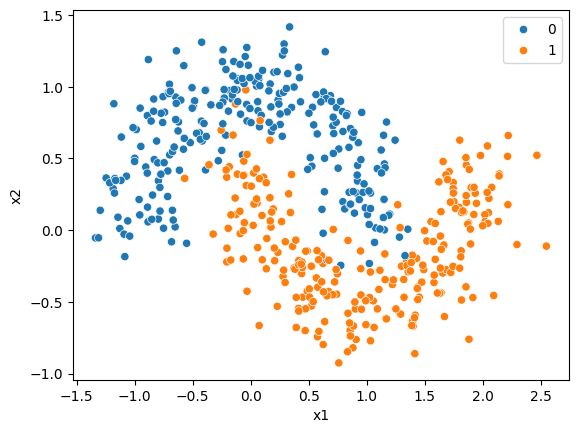

In [6]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue=y)
plt.show()

In [7]:
x_a=dataset.iloc[:,:-1]
y_a=dataset["y"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 93.0)

In [12]:
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_train,y_train)*100,svm.score(x_test,y_test)*100

(96.25, 96.0)

In [13]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(84.25, 87.0)

## Ensembled Learing

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [16]:
vc=VotingClassifier(li,weights=[5,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [17]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(96.5, 95.0)

### Checking that it runs prefect or not

In [18]:
prd={"dt":dt.predict(x_test),"svm":svm.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [19]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,1,1,1
1,1,0,0,0
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
95,1,1,1,1
96,1,1,1,1
97,0,0,0,0
98,1,1,1,1
